In [3]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

# Clean & check 'orders'

In [ ]:
orders = pd.read_csv("data/muesli_raw_orders.csv", header=1)

In [ ]:
orders.columns = orders.columns.str.lower()

In [ ]:
cols = orders.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
orders.columns = cols

In [ ]:
orders['order_date'] = pd.to_datetime(orders['order_date'], format="%d/%m/%Y")

In [ ]:
orders.drop_duplicates(subset="order_id", inplace=True)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9988
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           5009 non-null   int64         
 1   order_id        5009 non-null   object        
 2   order_date      5009 non-null   datetime64[ns]
 3   ship_mode       5009 non-null   object        
 4   customer_id     5009 non-null   object        
 5   customer_name   5009 non-null   object        
 6   origin_channel  5009 non-null   object        
 7   country/region  5009 non-null   object        
 8   city            5009 non-null   object        
 9   state           5009 non-null   object        
 10  postal_code     5003 non-null   float64       
 11  region          5009 non-null   object        
 12  category        5009 non-null   object        
 13  sub-category    5009 non-null   object        
 14  product_id      5009 non-null   object        
 15  sale

In [ ]:
orders.ship_mode.value_counts()

Standard Class    2994
First Class       1051
Second Class       964
Name: ship_mode, dtype: int64

# Clean & Check 'truck'

In [ ]:
truck = pd.read_csv("data/muesli_truck_data.csv")

In [ ]:
cols = truck.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
truck.columns = cols

In [ ]:
truck.columns = truck.columns.str.lower()

In [ ]:
truck.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [ ]:
truck['order_date'] = pd.to_datetime(truck['order_date'], format="%d/%m/%Y")
truck['on_truck_scan_date'] = pd.to_datetime(truck['on_truck_scan_date'], format="%d/%m/%Y")

In [ ]:
truck.drop_duplicates(subset="order_id", inplace=True)

In [ ]:
truck.drop(["order_date"], axis=1, inplace=True)

In [ ]:
truck.drop(["row_id"], axis=1, inplace=True)

In [ ]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5898
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   on_truck_scan_date  3002 non-null   datetime64[ns]
 2   ship_mode           3002 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 93.8+ KB


In [ ]:
truck.head()

,order_id,on_truck_scan_date,ship_mode
0,CA-2019-125206,2019-01-07,Express
1,CA-2019-160304,2019-01-09,Standard Processing
3,US-2019-116365,2019-01-09,Standard Processing
6,CA-2019-105207,2019-01-09,Standard Processing
8,CA-2019-158211,2019-01-09,Standard Processing


In [ ]:
truck.ship_mode.value_counts()

Standard Processing    2340
Express                 662
Name: ship_mode, dtype: int64

# Clean & check 'intern'

In [ ]:
intern = pd.read_csv("data/muesli_intern_data.csv")

In [ ]:
intern.columns = intern.columns.str.lower()

In [ ]:
cols = intern.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
intern.columns = cols

In [ ]:
intern["ready_to_ship_date"] = pd.to_datetime(intern["ready_to_ship_date"], format="%d/%m/%Y")
intern["pickup_date"] = pd.to_datetime(intern["pickup_date"], format="%d/%m/%Y")

In [ ]:
intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [ ]:
intern.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06


In [ ]:
intern.drop_duplicates(subset="order_id", inplace=True)

# Creating new DataFrame for Process Time

In [ ]:
orders_in = orders[["order_id", "order_date"]]

In [ ]:
orders_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9988
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    5009 non-null   object        
 1   order_date  5009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 117.4+ KB


In [ ]:
process_time = orders_in.merge(truck, how='left', on='order_id')

In [ ]:
process_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5009 non-null   object        
 1   order_date          5009 non-null   datetime64[ns]
 2   on_truck_scan_date  3002 non-null   datetime64[ns]
 3   ship_mode           3002 non-null   object        
dtypes: datetime64[ns](2), object(2)
memory usage: 195.7+ KB


In [ ]:
process_time.head()

,order_id,order_date,on_truck_scan_date,ship_mode
0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,2019-03-13,Express
2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,2019-06-19,Express
4,CA-2018-135545,2018-11-24,NaT,NaN


In [ ]:
# Prüfung ob order_date in truck eliminiert werden kann -> Ja

# process_time["check_order_date"] = process_time["order_date_x"] - process_time["order_date_y"]
# process_time["check_order_date"].nunique()
# process_time.drop(["order_date_y"], axis=1)
# process_time.drop(["check_order_date"], axis=1)

In [ ]:
process_time["delta_order_truck"] = process_time["on_truck_scan_date"] - process_time["order_date"]
process_time['delta_order_truck'] = process_time['delta_order_truck'].astype('timedelta64[D]')

In [ ]:
process_time.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [ ]:
process_time.reset_index()

,index,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck
0,0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing,7.0
1,1,CA-2019-118255,2019-03-11,2019-03-13,Express,2.0
2,2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing,6.0
3,3,CA-2019-111682,2019-06-17,2019-06-19,Express,2.0
4,5,CA-2020-155558,2020-10-26,2020-11-04,Standard Processing,9.0
...,...,...,...,...,...,...
2997,5002,US-2020-109610,2020-11-25,2020-12-02,Standard Processing,7.0
2998,5004,CA-2019-146913,2019-10-31,2019-11-06,Standard Processing,6.0
2999,5006,CA-2020-107209,2020-07-27,2020-08-05,Standard Processing,9.0
3000,5007,US-2020-152842,2020-07-16,2020-07-24,Standard Processing,8.0


In [ ]:
process_time.head(20)

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck
0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing,7.0
1,CA-2019-118255,2019-03-11,2019-03-13,Express,2.0
2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing,6.0
3,CA-2019-111682,2019-06-17,2019-06-19,Express,2.0
5,CA-2020-155558,2020-10-26,2020-11-04,Standard Processing,9.0
6,CA-2019-158568,2019-08-29,2019-09-04,Standard Processing,6.0
8,CA-2020-119004,2020-11-23,2020-12-02,Standard Processing,9.0
16,US-2020-100930,2020-04-07,2020-04-15,Standard Processing,8.0
17,CA-2019-145625,2019-09-11,2019-09-18,Standard Processing,7.0
18,CA-2020-163139,2020-12-01,2020-12-04,Standard Processing,3.0


In [ ]:
process_time.ship_mode.unique()

array(['Standard Processing', 'Express'], dtype=object)

In [ ]:
process_time["order_weekday"] = process_time["order_date"].dt.dayofweek
process_time["on_truck_weekday"] = process_time["on_truck_scan_date"].dt.dayofweek
process_time["order_year"] = process_time["order_date"].dt.year

### Calculation for 83% in slides

In [ ]:
process_time.delta_order_truck.unique()

array([ 7.,  2.,  6.,  9.,  8.,  3.,  5.,  1.,  4., 10.,  0., 11., 12.])

In [ ]:
process_time.head()

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
0,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing,7.0,2,2,2019
1,CA-2019-118255,2019-03-11,2019-03-13,Express,2.0,0,2,2019
2,CA-2019-169194,2019-06-20,2019-06-26,Standard Processing,6.0,3,2,2019
3,CA-2019-111682,2019-06-17,2019-06-19,Express,2.0,0,2,2019
5,CA-2020-155558,2020-10-26,2020-11-04,Standard Processing,9.0,0,2,2020


In [ ]:
process_time.query("ship_mode == 'Express' and delta_order_truck > 3")

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
52,CA-2020-130351,2020-12-05,2020-12-11,Express,6.0,5,4,2020
116,US-2020-132444,2020-11-18,2020-11-23,Express,5.0,2,0,2020
131,US-2019-116729,2019-12-25,2019-12-30,Express,5.0,2,0,2019
182,CA-2019-114972,2019-11-03,2019-11-08,Express,5.0,6,4,2019
201,CA-2020-122707,2020-04-16,2020-04-20,Express,4.0,3,0,2020
...,...,...,...,...,...,...,...,...
4903,CA-2019-124793,2019-03-14,2019-03-18,Express,4.0,3,0,2019
4939,CA-2020-143756,2020-12-02,2020-12-07,Express,5.0,2,0,2020
4961,CA-2019-105746,2019-12-30,2020-01-03,Express,4.0,0,4,2019
4962,CA-2019-138597,2019-12-18,2019-12-23,Express,5.0,2,0,2019


In [ ]:
x = process_time.query("order_weekday == 1 and delta_order_truck > 3")
x

,order_id,order_date,on_truck_scan_date,ship_mode,delta_order_truck,order_weekday,on_truck_weekday,order_year
16,US-2020-100930,2020-04-07,2020-04-15,Standard Processing,8.0,1,2,2020
24,CA-2019-162138,2019-04-23,2019-05-01,Standard Processing,8.0,1,2,2019
31,CA-2020-117457,2020-12-08,2020-12-16,Standard Processing,8.0,1,2,2020
58,US-2020-100048,2020-05-19,2020-05-27,Standard Processing,8.0,1,2,2020
59,CA-2020-131954,2020-01-21,2020-01-29,Standard Processing,8.0,1,2,2020
...,...,...,...,...,...,...,...,...
4954,CA-2020-100412,2020-12-22,2020-12-30,Standard Processing,8.0,1,2,2020
4971,US-2020-167570,2020-12-08,2020-12-16,Standard Processing,8.0,1,2,2020
4981,CA-2020-137624,2020-11-10,2020-11-18,Standard Processing,8.0,1,2,2020
4982,CA-2019-123540,2019-04-02,2019-04-10,Standard Processing,8.0,1,2,2019


# Visualisierung

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

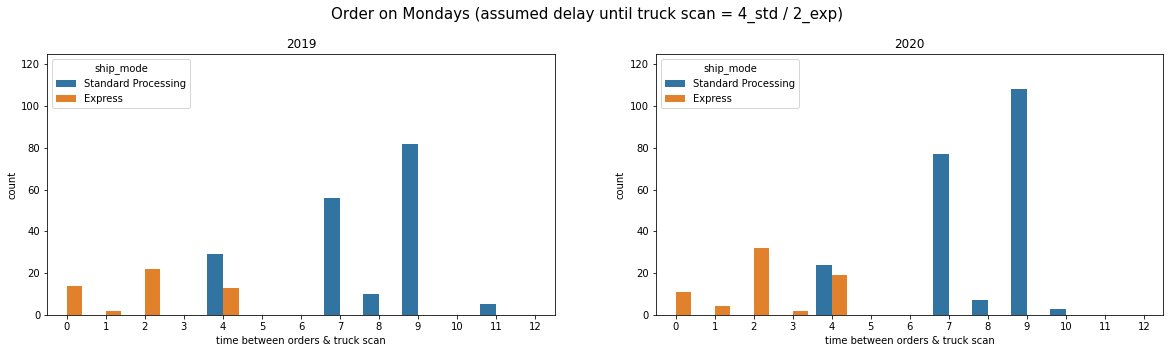

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Mondays (assumed delay until truck scan = 4_std / 2_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process_time.query('order_weekday == 0 and order_year == 2019')["delta_order_truck"], hue=process_time["ship_mode"], ax=ax[0], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125)

fig = sns.countplot(x=process_time.query('order_weekday == 0 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[1], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


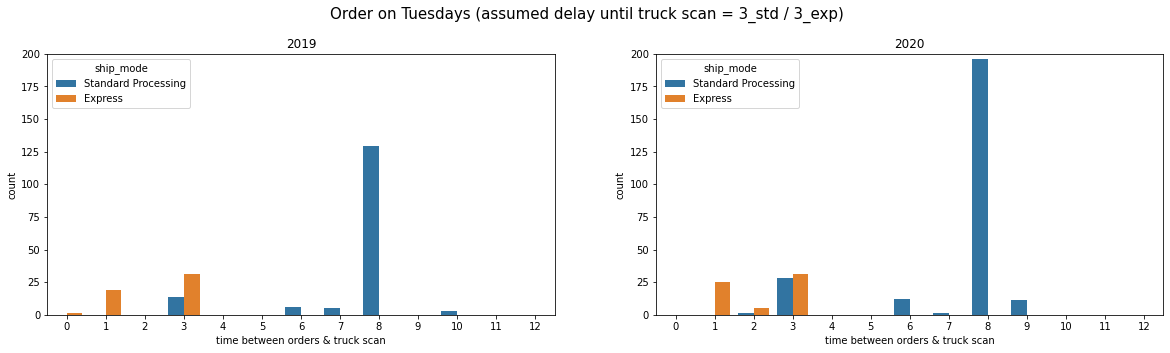

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Tuesdays (assumed delay until truck scan = 3_std / 3_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)
plt.legend(loc='upper left')

fig = sns.countplot(x=process_time.query('order_weekday == 1 and order_year == 2019')["delta_order_truck"],
                    hue=process_time["ship_mode"], 
                    ax=ax[0], 
                    order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)


fig = sns.countplot(x=process_time.query('order_weekday == 1 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[1], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

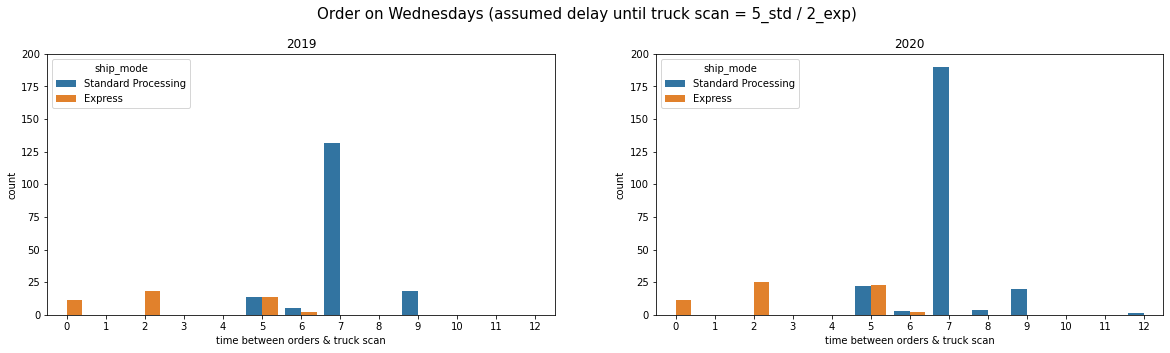

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Wednesdays (assumed delay until truck scan = 5_std / 2_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process_time.query('order_weekday == 2 and order_year == 2019')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)

fig = sns.countplot(x=process_time.query('order_weekday == 2 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

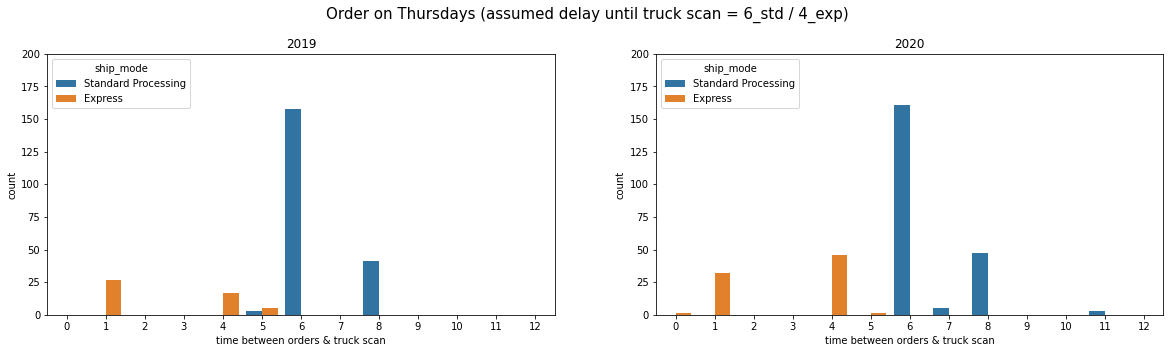

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Thursdays (assumed delay until truck scan = 6_std / 4_exp)", fontsize=15)
plt.subplots_adjust(top=0.85)

fig = sns.countplot(x=process_time.query('order_weekday == 3 and order_year == 2019')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[0], order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200)

fig = sns.countplot(x=process_time.query('order_weekday == 3 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"],ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,200);

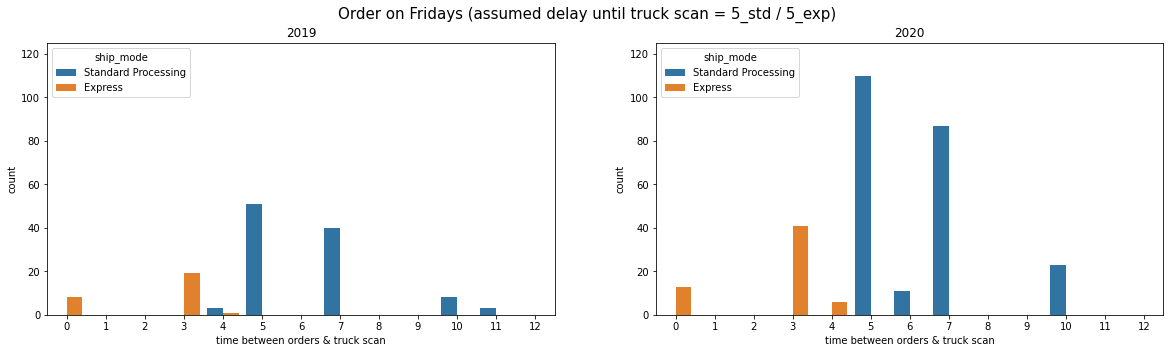

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Fridays (assumed delay until truck scan = 5_std / 5_exp)", fontsize=15)

fig = sns.countplot(x=process_time.query('order_weekday == 4 and order_year == 2019')["delta_order_truck"],hue=process_time["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125)

fig = sns.countplot(x=process_time.query('order_weekday == 4 and order_year == 2020')["delta_order_truck"],hue=process_time["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,125);

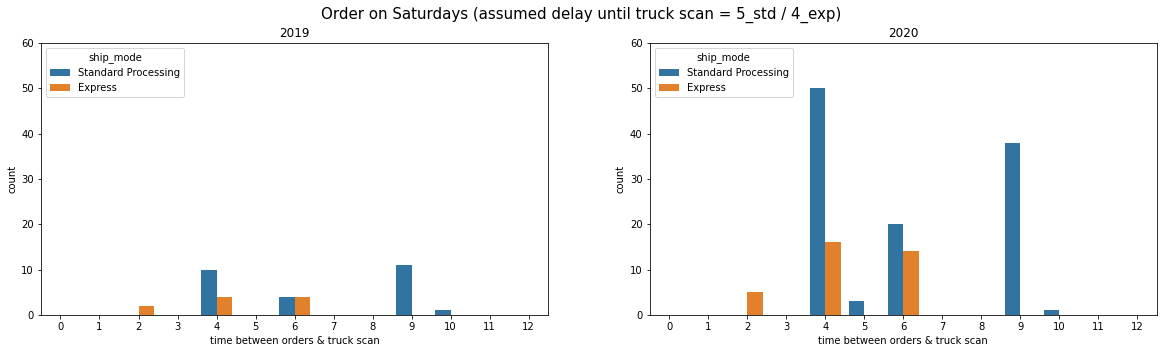

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Saturdays (assumed delay until truck scan = 5_std / 4_exp)", fontsize=15)

fig = sns.countplot(x=process_time.query('order_weekday == 5 and order_year == 2019')["delta_order_truck"], hue=process_time["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,60)

fig = sns.countplot(x=process_time.query('order_weekday == 5 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,60);

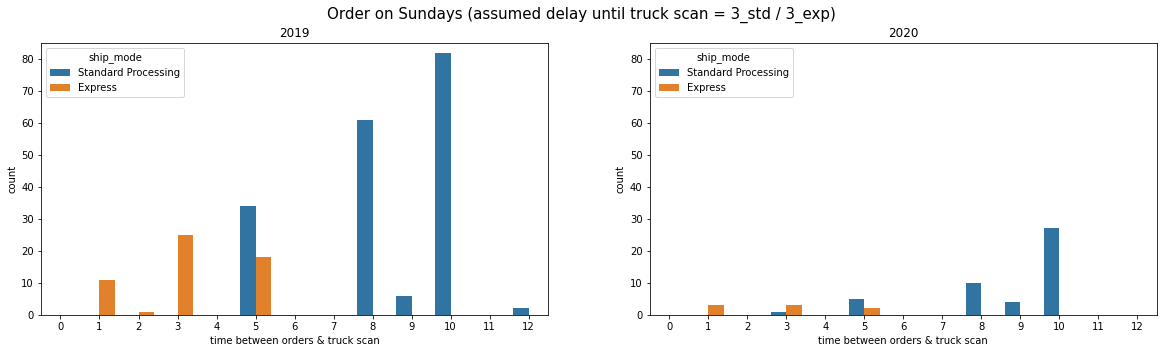

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Order on Sundays (assumed delay until truck scan = 3_std / 3_exp)", fontsize=15)

fig = sns.countplot(x=process_time.query('order_weekday == 6 and order_year == 2019')["delta_order_truck"], hue=process_time["ship_mode"], ax=ax[0],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2019")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,85)

fig = sns.countplot(x=process_time.query('order_weekday == 6 and order_year == 2020')["delta_order_truck"], hue=process_time["ship_mode"], ax=ax[1],order=[0,1,2,3,4,5,6,7,8,9,10,11,12])
fig.set_title("2020")
sns.move_legend(fig,"upper left")
fig.set_xlabel("time between orders & truck scan")
fig.set_ylim(0,85);

In [ ]:
#years = sorted(process_time.order_year.unique())
#f1 = sns.catplot(x="order_day", col="order_year", kind="count", col_wrap=4, data=process_time., hue="ship_mode", palette="pastel")
#f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=90);

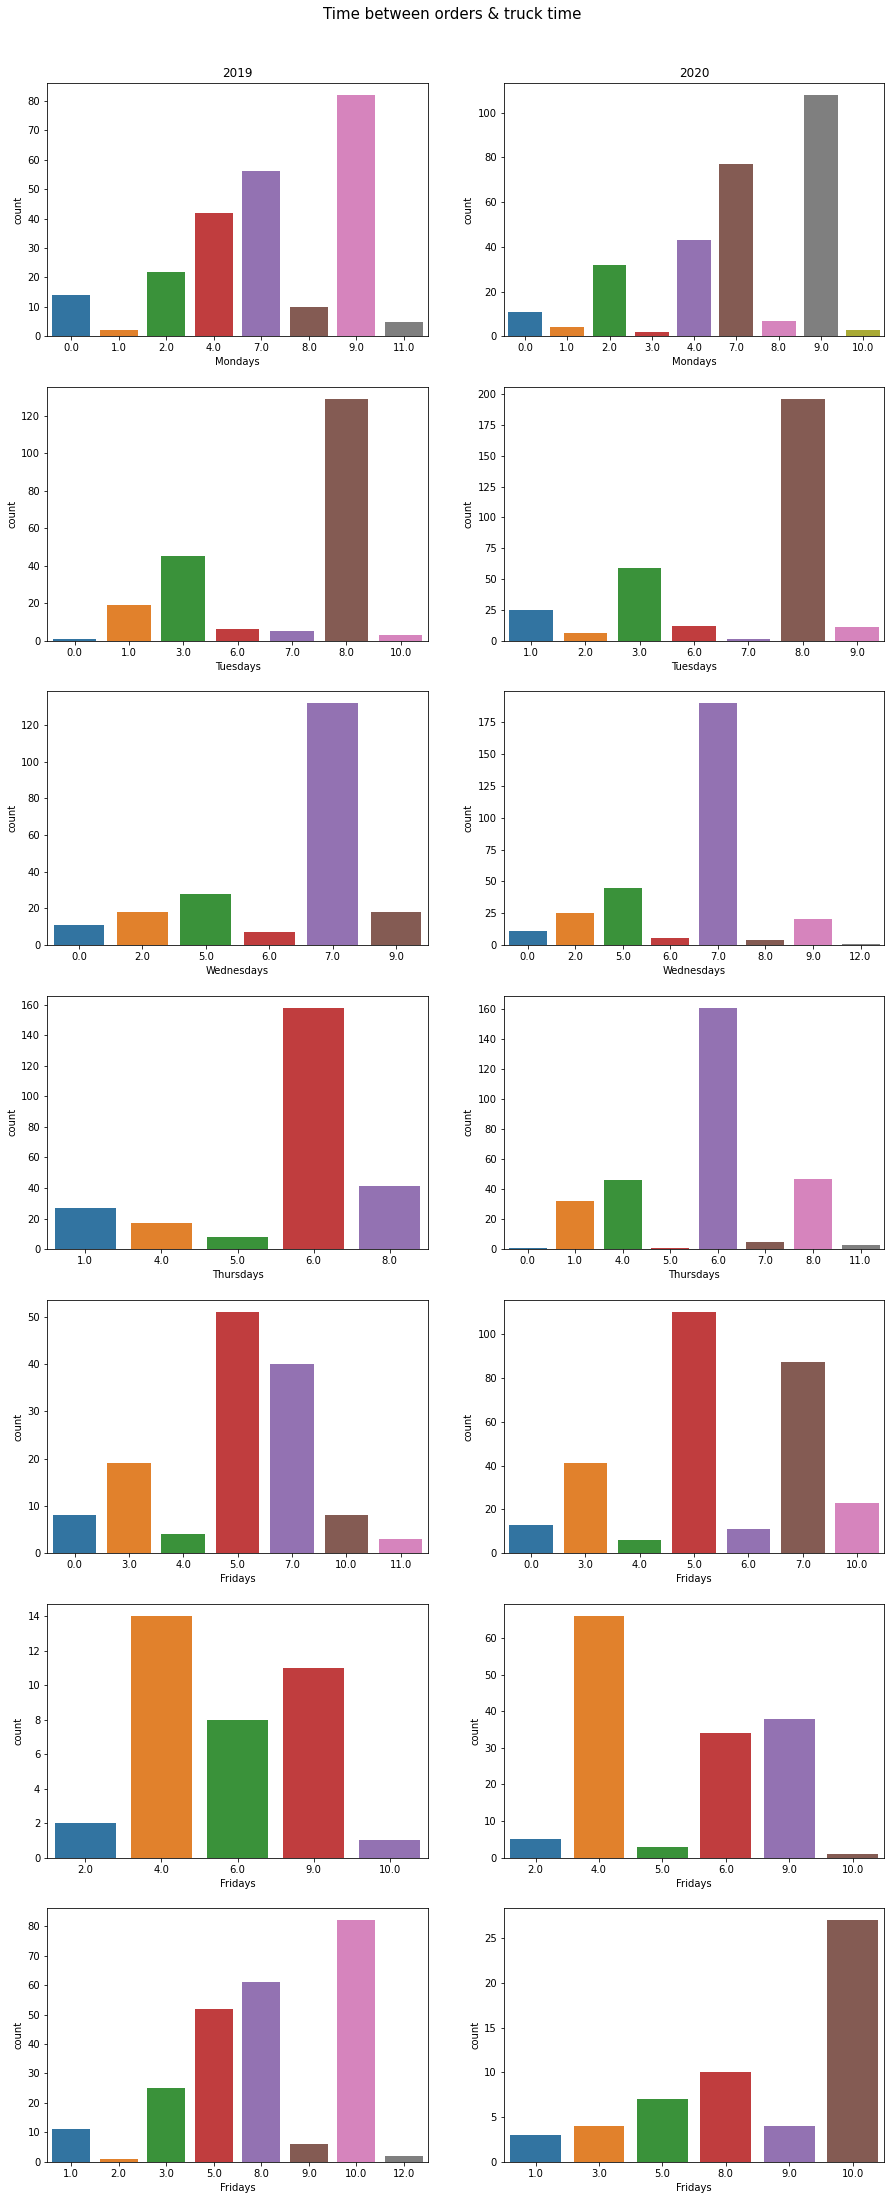

In [ ]:
fig, ax = plt.subplots(7,2, figsize=(15,35))
#fig.tight_layout(h_pad=6)
fig.suptitle("Time between orders & truck time", fontsize=15)
#plt.subplots_adjust(wspace=0)
#plt.subplots_adjust(hspace=0)
plt.subplots_adjust(top=0.95)

fig_1 = sns.countplot(x=process_time.query('order_weekday == 0 and order_year == 2019')["delta_order_truck"], ax=ax[0,0])
fig_1.set_title("2019")
fig_1.set_xlabel("Mondays")

fig_2 =  sns.countplot(x=process_time.query('order_weekday == 0 and order_year == 2020')["delta_order_truck"], ax=ax[0,1])
fig_2.set_title("2020")
fig_2.set_xlabel("Mondays")

fig_3 = sns.countplot(x=process_time.query('order_weekday == 1 and order_year == 2019')["delta_order_truck"], ax=ax[1,0])
#fig_3.set_title("2019")
fig_3.set_xlabel("Tuesdays")

fig_4 =  sns.countplot(x=process_time.query('order_weekday == 1 and order_year == 2020')["delta_order_truck"], ax=ax[1,1])
#fig_4.set_title("2020")
fig_4.set_xlabel("Tuesdays");

fig_5 = sns.countplot(x=process_time.query('order_weekday == 2 and order_year == 2019')["delta_order_truck"], ax=ax[2,0])
#fig_5.set_title("2019")
fig_5.set_xlabel("Wednesdays")

fig_6 =  sns.countplot(x=process_time.query('order_weekday == 2 and order_year == 2020')["delta_order_truck"], ax=ax[2,1])
#fig_6.set_title("2020")
fig_6.set_xlabel("Wednesdays");

fig_7 = sns.countplot(x=process_time.query('order_weekday == 3 and order_year == 2019')["delta_order_truck"], ax=ax[3,0])
#fig_7.set_title("2019")
fig_7.set_xlabel("Thursdays")

fig_8 =  sns.countplot(x=process_time.query('order_weekday == 3 and order_year == 2020')["delta_order_truck"], ax=ax[3,1])
#fig_8.set_title("2020")
fig_8.set_xlabel("Thursdays");

fig_9 = sns.countplot(x=process_time.query('order_weekday == 4 and order_year == 2019')["delta_order_truck"], ax=ax[4,0])
#fig_9.set_title("2019")
fig_9.set_xlabel("Fridays")

fig_10 =  sns.countplot(x=process_time.query('order_weekday == 4 and order_year == 2020')["delta_order_truck"], ax=ax[4,1])
#fig_10.set_title("2020")
fig_10.set_xlabel("Fridays");

fig_11 = sns.countplot(x=process_time.query('order_weekday == 5 and order_year == 2019')["delta_order_truck"], ax=ax[5,0])
fig_11.set_xlabel("Fridays")

fig_12 =  sns.countplot(x=process_time.query('order_weekday == 5 and order_year == 2020')["delta_order_truck"], ax=ax[5,1])
fig_12.set_xlabel("Fridays");

fig_13 = sns.countplot(x=process_time.query('order_weekday == 6 and order_year == 2019')["delta_order_truck"], ax=ax[6,0])
fig_13.set_xlabel("Fridays")

fig_14 =  sns.countplot(x=process_time.query('order_weekday == 6 and order_year == 2020')["delta_order_truck"], ax=ax[6,1])
fig_14.set_xlabel("Fridays");

# 1. try to find the bad product
### results aren't sufficient because used DataFrame does not have all possible Product_IDs in it

In [ ]:
bad_product = orders_in2.merge(truck, how='left', on='order_id')

In [ ]:
bad_product.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [ ]:
bad_product["order_weekday"] = bad_product["order_date"].dt.dayofweek
bad_product["on_truck_weekday"] = bad_product["on_truck_scan_date"].dt.dayofweek
bad_product["order_year"] = bad_product["order_date"].dt.year

In [ ]:
bad_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5008
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   order_date          3002 non-null   datetime64[ns]
 2   category            3002 non-null   object        
 3   product_id          3002 non-null   object        
 4   on_truck_scan_date  3002 non-null   datetime64[ns]
 5   ship_mode           3002 non-null   object        
 6   order_weekday       3002 non-null   int64         
 7   on_truck_weekday    3002 non-null   int64         
 8   order_year          3002 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 234.5+ KB


In [ ]:
bad_product["delta_order_truck"] = bad_product["on_truck_scan_date"] - bad_product["order_date"]
bad_product['delta_order_truck'] = bad_product['delta_order_truck'].astype('timedelta64[D]')

In [ ]:
bad_product.head()

,order_id,order_date,category,product_id,on_truck_scan_date,ship_mode,order_weekday,on_truck_weekday,order_year,delta_order_truck
0,CA-2019-121755,2019-01-16,Special Projects Muesil,TEC-AC-10003027,2019-01-23,Standard Processing,2,2,2019,7.0
1,CA-2019-118255,2019-03-11,Special Projects Muesil,TEC-AC-10000171,2019-03-13,Express,0,2,2019,2.0
2,CA-2019-169194,2019-06-20,Special Projects Muesil,TEC-AC-10002167,2019-06-26,Standard Processing,3,2,2019,6.0
3,CA-2019-111682,2019-06-17,Special Projects Muesil,TEC-AC-10002167,2019-06-19,Express,0,2,2019,2.0
5,CA-2020-155558,2020-10-26,Special Projects Muesil,TEC-AC-10001998,2020-11-04,Standard Processing,0,2,2020,9.0


In [ ]:
bad_product.product_id.unique()

array(['TEC-AC-10003027', 'TEC-AC-10000171', 'TEC-AC-10002167', ...,
       'FUR-CH-10004698', 'FUR-CH-10000665', 'FUR-CH-10003981'],
      dtype=object)

In [ ]:
bad_product.product_id.max()

'TEC-PH-10004977'

In [ ]:
bad_product.query("product_id == 'TEC-PH-10004977'")

,order_id,order_date,category,product_id,on_truck_scan_date,ship_mode,order_weekday,on_truck_weekday,order_year,delta_order_truck
2557,CA-2019-117590,2019-12-08,Special Projects Muesil,TEC-PH-10004977,2019-12-11,Express,6,2,2019,3.0
2795,CA-2020-122196,2020-09-22,Special Projects Muesil,TEC-PH-10004977,2020-09-25,Express,1,4,2020,3.0


In [ ]:
bad_product.product_id.value_counts().unique()

array([14,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
a = bad_product.product_id.value_counts()
b = a.value_counts()
print(b)

1     574
2     452
3     243
4     114
5      32
6      19
7       5
8       2
14      1
Name: product_id, dtype: int64


In [ ]:
category = bad_product.groupby("category")
cate = category["product_id"].count()
cate

category
Power Muesli               1846
Special Projects Muesil     759
Toasted Muesli              397
Name: product_id, dtype: int64

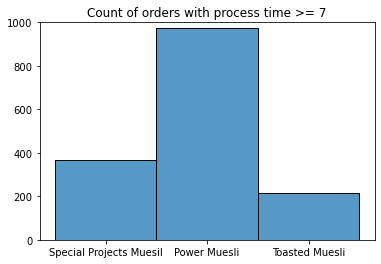

In [ ]:
bad_cat = bad_product.query("delta_order_truck >= 7")
#fig.tight_layout(h_pad=6)
fig = sns.histplot(data=bad_cat, x= bad_cat["category"])
fig.set_title("Count of orders with process time >= 7", fontsize=12)
fig.set_xlabel(xlabel="")
fig.set_ylabel(ylabel="")
fig.set_ylim(0,1000);

In [ ]:
bad_mon = bad_product.query("delta_order_truck >= 7 and order_weekday == 0")
bad_tue = bad_product.query("delta_order_truck >= 7 and order_weekday == 1")
bad_wed = bad_product.query("delta_order_truck >= 7 and order_weekday == 2")
bad_thu = bad_product.query("delta_order_truck >= 7 and order_weekday == 3")
bad_fri = bad_product.query("delta_order_truck >= 7 and order_weekday == 4")
bad_sat = bad_product.query("delta_order_truck >= 7 and order_weekday == 5")
bad_sun = bad_product.query("delta_order_truck >= 7 and order_weekday == 6")

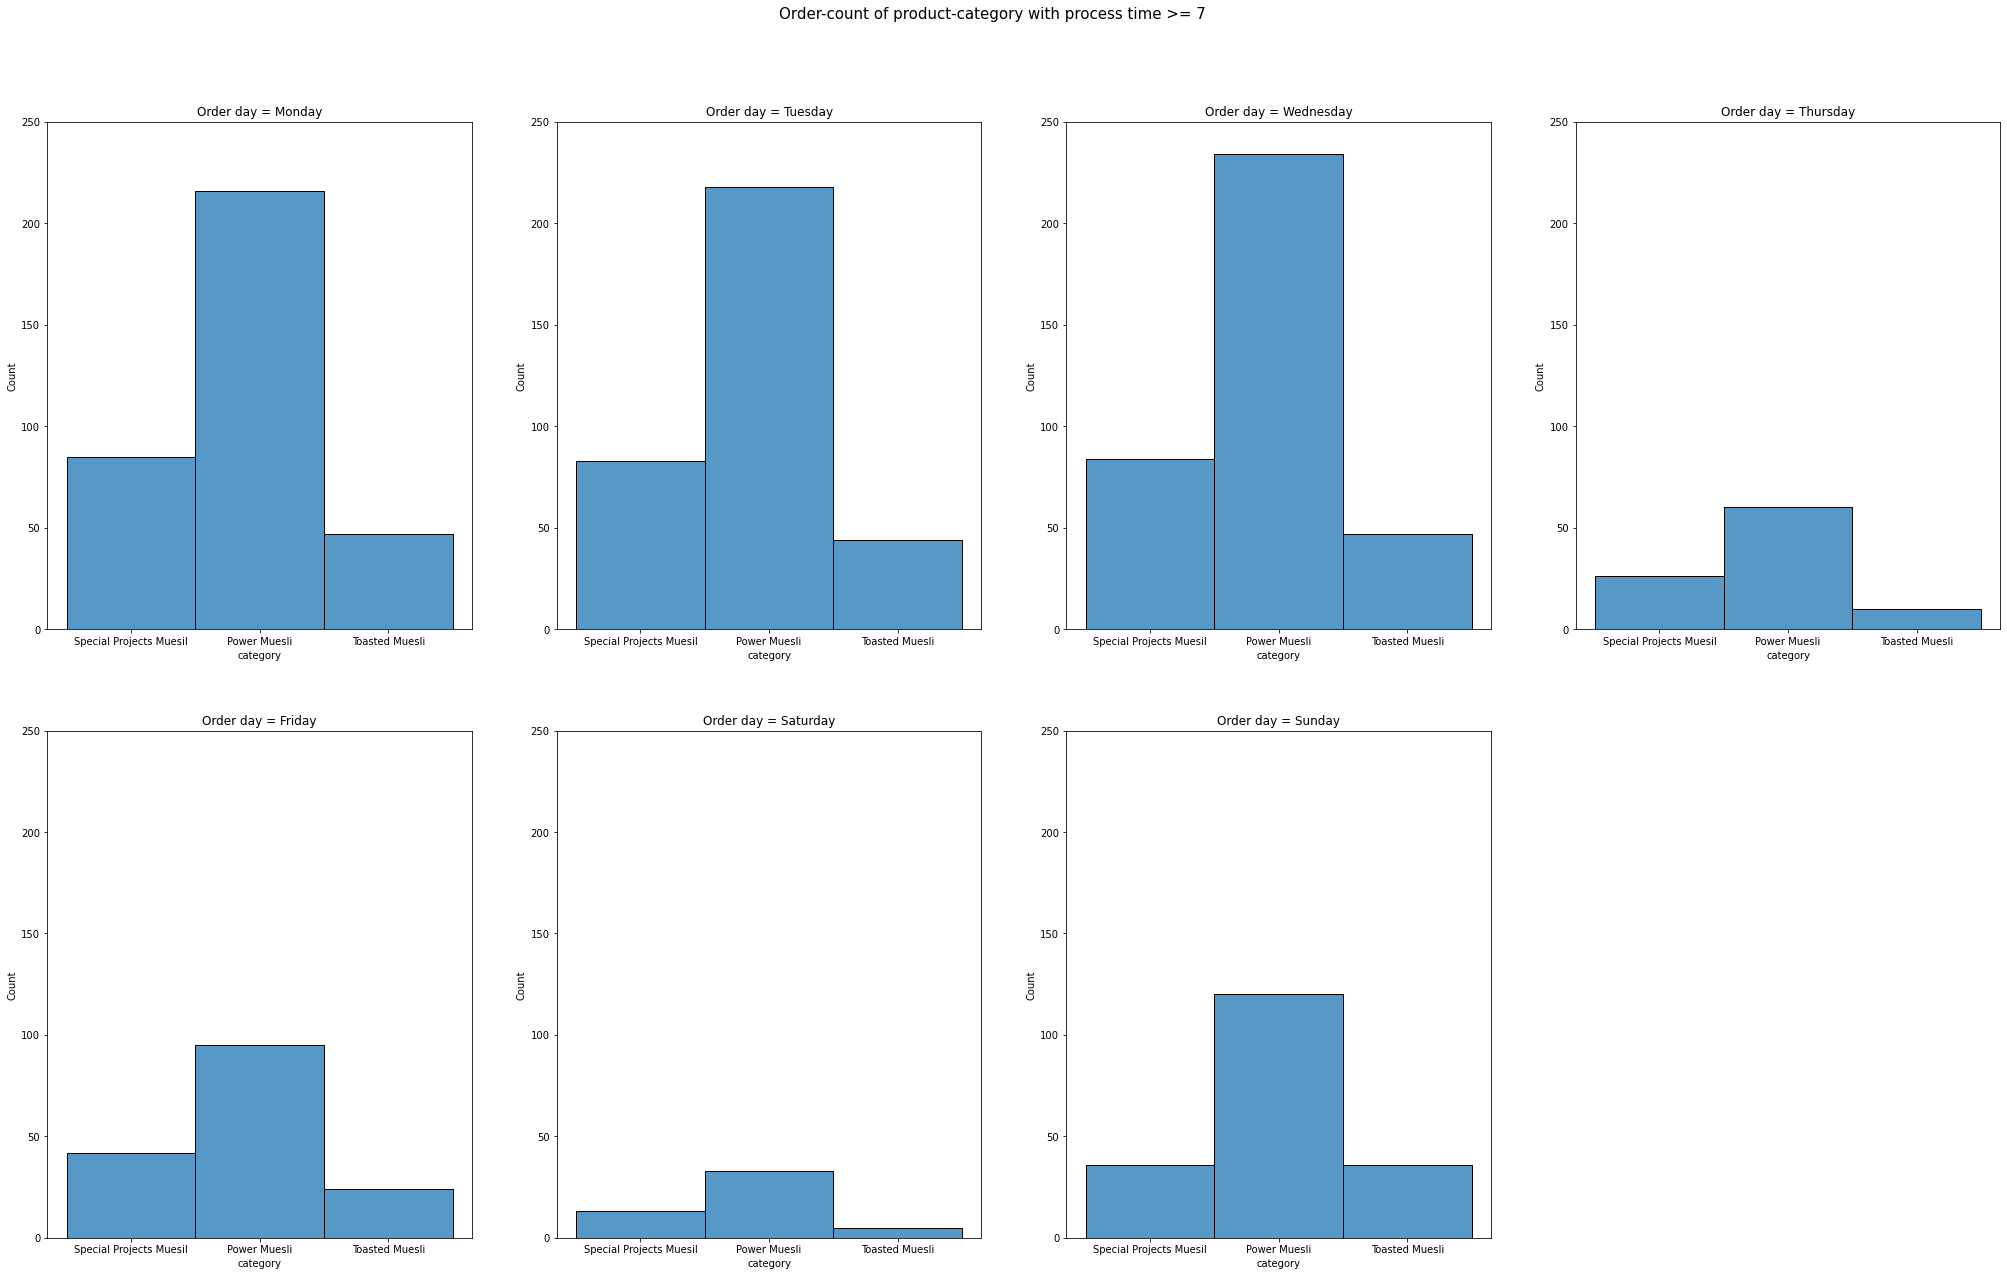

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(35,20))
#fig.tight_layout(h_pad=6)
fig.suptitle("Order-count of product-category with process time >= 7", fontsize=15)
#plt.subplots_adjust(wspace=0)
#plt.subplots_adjust(hspace=0)
plt.subplots_adjust(top=0.9)

fig = sns.histplot(data=bad_mon, x= bad_mon["category"], ax=ax[0,0])
fig.set_title("Order day = Monday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_tue, x= bad_tue["category"], ax=ax[0,1])
fig.set_title("Order day = Tuesday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_wed, x= bad_wed["category"], ax=ax[0,2])
fig.set_title("Order day = Wednesday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_thu, x= bad_thu["category"], ax=ax[0,3])
fig.set_title("Order day = Thursday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_fri, x= bad_fri["category"], ax=ax[1,0])
fig.set_title("Order day = Friday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_sat, x= bad_sat["category"], ax=ax[1,1])
fig.set_title("Order day = Saturday")
fig.set_ylim(0,250);

fig = sns.histplot(data=bad_sun, x= bad_sun["category"], ax=ax[1,2])
fig.set_title("Order day = Sunday")
fig.set_ylim(0,250);

fig = sns.histplot(ax=ax[1,3])
ax[1,3].axis("off");


# 2. Try to find product causing delays
### Creating new DataFrame (because process_time just has 3002 rows and a lot of Product_Ids have been removed because they had no on_truck date)
#### not finished -> starting new Notebook

In [ ]:
import numpy as np

In [ ]:
orders_badprod = pd.read_csv("data/muesli_raw_orders.csv", header=1)

In [ ]:
cols = orders_badprod.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
orders_badprod.columns = cols

In [ ]:
orders_badprod.columns = orders_badprod.columns.str.lower()

In [ ]:
orders_in2 = orders_badprod[["order_id", "order_date","category", "product_id"]]

In [ ]:
orders_in2['order_date'] = pd.to_datetime(orders_in2['order_date'], format="%d/%m/%Y")

In [ ]:
bad_product2 = orders_in2.set_index("order_id").join(truck.set_index("order_id"), rsuffix="_process")
bad_product2.dropna(subset="on_truck_scan_date", axis=0, inplace=True)
bad_product2

In [ ]:
bad_product2.info()

In [ ]:
bad_product2["order_weekday"] = bad_product2["order_date"].dt.dayofweek
bad_product2["on_truck_weekday"] = bad_product2["on_truck_scan_date"].dt.dayofweek
bad_product2["order_year"] = bad_product2["order_date"].dt.year

In [ ]:
bad_product2["delta_order_truck"] = bad_product2["on_truck_scan_date"] - bad_product2["order_date"]
bad_product2['delta_order_truck'] = bad_product2['delta_order_truck'].astype('timedelta64[D]')

In [ ]:
bad_product2.product_id.nunique()

1689

# Creating new DataFrame for Linear Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = orders[["order_id", "quantity", "sales","category", "discount", "profit"]]

In [ ]:
regress = df.merge(process_time, how="left", on="order_id")
regress.dropna(axis=0,subset="on_truck_scan_date", inplace=True)

In [ ]:
regress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 5008
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            3002 non-null   object        
 1   quantity            3002 non-null   int64         
 2   sales               3002 non-null   float64       
 3   category            3002 non-null   object        
 4   discount            3002 non-null   float64       
 5   profit              3002 non-null   float64       
 6   order_date          3002 non-null   datetime64[ns]
 7   on_truck_scan_date  3002 non-null   datetime64[ns]
 8   ship_mode           3002 non-null   object        
 9   delta_order_truck   3002 non-null   float64       
 10  order_weekday       3002 non-null   float64       
 11  on_truck_weekday    3002 non-null   float64       
 12  order_year          3002 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(1), obje

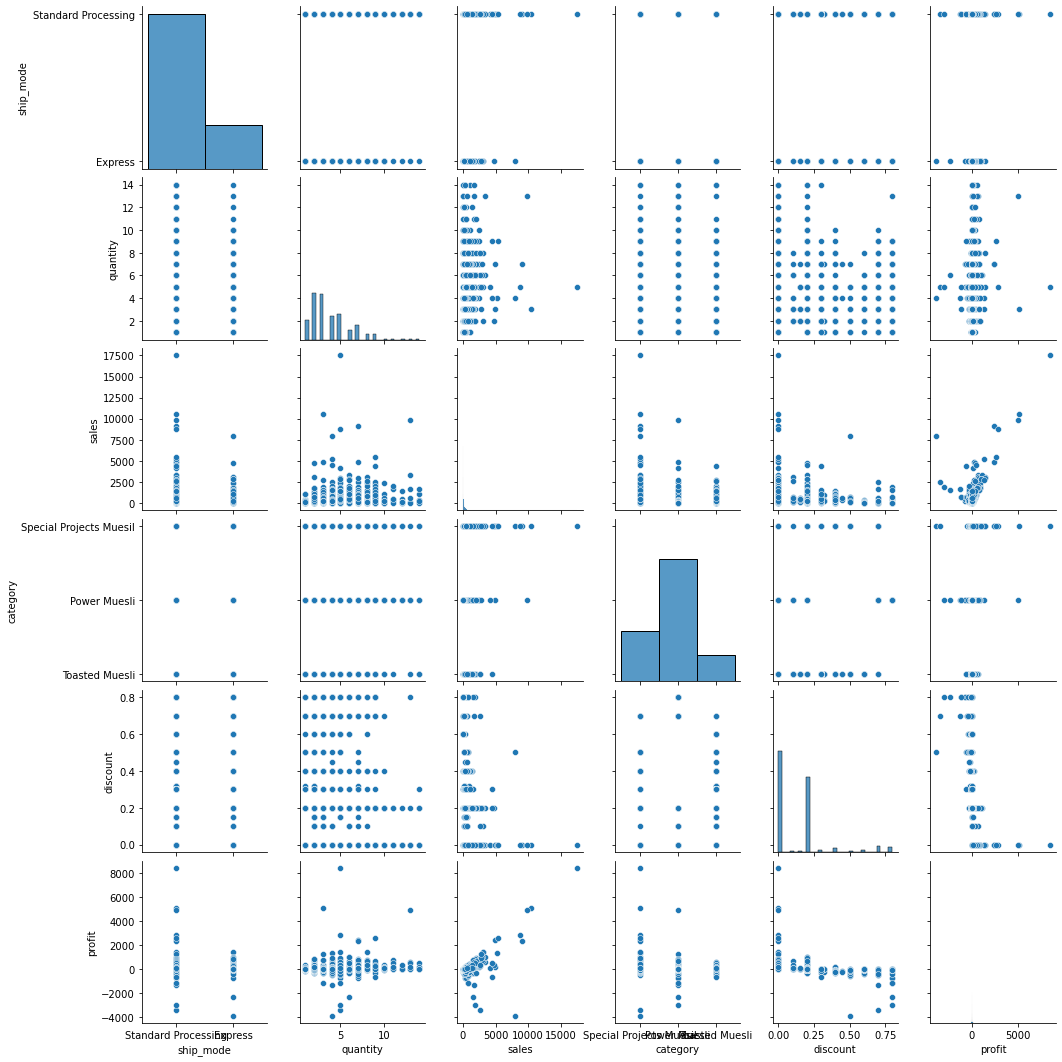

In [ ]:
sns.pairplot(regress, vars=["ship_mode", "quantity", "sales","category", "discount", "profit"]);

In [ ]:
regress.corr()

,quantity,sales,discount,profit,delta_order_truck,order_weekday,on_truck_weekday,order_year
quantity,1.000000,0.181462,-0.019757,0.103892,0.039599,-0.007870,0.041690,-0.006874
sales,0.181462,1.000000,-0.040008,0.650268,-0.000906,-0.041083,0.029617,-0.020502
discount,-0.019757,-0.040008,1.000000,-0.201294,-0.008778,-0.030647,0.010244,-0.001221
profit,0.103892,0.650268,-0.201294,1.000000,0.014848,-0.014566,0.030674,-0.039933
delta_order_truck,0.039599,-0.000906,-0.008778,0.014848,1.000000,0.007351,-0.129763,-0.033670
order_weekday,-0.007870,-0.041083,-0.030647,-0.014566,0.007351,1.000000,0.009519,-0.081206
on_truck_weekday,0.041690,0.029617,0.010244,0.030674,-0.129763,0.009519,1.000000,-0.002830
order_year,-0.006874,-0.020502,-0.001221,-0.039933,-0.033670,-0.081206,-0.002830,1.000000
